In [88]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import seaborn as sns


In [71]:
orig_df = pd.read_csv("bank-full.csv", sep=";")
orig_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [106]:
orig_df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [107]:
## Re-mapping the data for analysis
df = orig_df.copy()
df['y'] = df['y'].map({'yes':1, 'no':0})
df['month'] = df['month'].map({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2,
       'mar':3, 'apr':4, 'sep':9})

df['marital'] = df['marital'].map({'married':2, 'single':1, 'divorced':3})
df['education'] = df['education'].map({'tertiary':1, 'secondary':2, 'unknown':3, 'primary':4})
df['default'] = df['default'].map({'yes':1, 'no':0})
df['housing'] = df['housing'].map({'yes':1, 'no':0})
df['loan'] = df['loan'].map({'yes':1, 'no':0})
df['job'] = df['job'].map({'management':1, 'technician':2, 'entrepreneur':3, 'blue-collar':4,
       'unknown':5, 'retired':6, 'admin.':7, 'services':8, 'self-employed':9,
       'unemployed':10, 'housemaid':11, 'student':12})

cols_to_drop = [ 'contact', 'poutcome']
df = df.drop(cols_to_drop, axis=1)

In [108]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['y'], axis=1), df['y'], test_size=0.3, random_state=42)

In [109]:
x_train.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
10747,36,2,1,1,0,0,0,0,17,6,153,4,-1,0
26054,56,3,2,2,0,196,0,0,19,11,312,3,-1,0
9125,46,4,2,2,0,0,1,0,5,6,83,2,-1,0
41659,41,1,3,1,0,3426,0,0,1,10,302,1,119,5
4443,38,4,2,2,0,0,1,0,20,5,90,1,-1,0


In [112]:

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 4, random_state = 42)


# Train the model on training data
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [113]:
rf.predict(x_test)[1:1000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

Accuracy is:  0.890002948982601


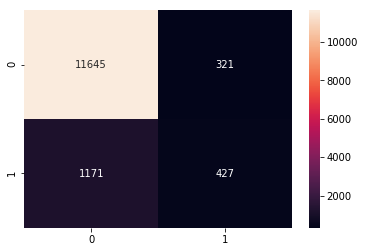

In [114]:
ac = accuracy_score(y_test,rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [115]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=3, step=1)
rfe = rfe.fit(x_train, y_train)

In [116]:


print('Chosen best 3 feature by rfe:',x_train.columns[rfe.support_])



Chosen best 3 feature by rfe: Index(['age', 'balance', 'duration'], dtype='object')
